In [8]:
%load_ext autoreload
%autoreload 2

from jax import config

config.update("jax_enable_x64", True)
config.update("jax_platform_name", "cpu")

import os
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".8"

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pickle

import sys
sys.path.append("../scripts/")

from colors import cols as papercols


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
time_stamp = "0802-114242"

In [10]:
# Get the initial connectivity matrix for the EI task (all the same because the same seed, so the timestamp shouldn't matter)
with open(f"../results/evint_init_params_{time_stamp}.pkl", "rb") as f:
    init_conn_matrix, init_inp_weights, RNN_params = pickle.load(f)

init_rec_matrix = init_conn_matrix[:20, :20]
init_out_weights = init_conn_matrix[:20, 20:].flatten()
init_inp_weights = init_inp_weights[0]["input_weights"]

In [11]:
# Get the trained connectivity matrix for the EI task
with open(f"../results/evint_final_conn_{time_stamp}.pkl", "rb") as f:
    final_conn_matrix = pickle.load(f)

with open(f"../results/evint_params_{time_stamp}.pkl", "rb") as f:
    params, task_params, RNN_params, train_params = pickle.load(f)

final_inp_weights = params[0]['input_weights']

final_rec_matrix = final_conn_matrix[:20, :20]
final_out_weights = final_conn_matrix[:20, 20:].flatten()
final_inp_weights = final_inp_weights.flatten()

### Panel e of the RNN figure

In [12]:
# Only plot the nonzero recurrent weights
init_rec_weights = init_rec_matrix.flatten()[init_rec_matrix.flatten() != 0]
print(init_rec_weights.shape)

final_rec_weights = final_rec_matrix.flatten()[final_rec_matrix.flatten() != 0]
final_rec_weights.shape

(69,)


(69,)

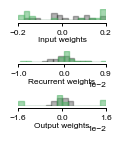

In [13]:
fit_color = papercols["parameter_cmap"](0.5)
lpad = 1

with mpl.rc_context(fname="../../../.matplotlibrc"):
    # Some rcParam editing because the plot is so differently shaped
    mpl.rcParams["axes.linewidth"] = 0.7
    mpl.rcParams["xtick.major.width"] = 0.7
    mpl.rcParams["ytick.major.width"] = 0.7

    fig, axs = plt.subplots(3, 1, figsize=(1.1, 1.3), constrained_layout=True)

    # Input weights
    bins = np.arange(-0.2, 0.2 + 1e-8, step=0.025)
    n_bins = len(bins)
    n, _, _ = axs[0].hist(init_inp_weights.flatten(), bins=bins, color="k", alpha=0.3, label="Initial", edgecolor="k")
    m, _, _ = axs[0].hist(final_inp_weights.flatten(), bins=bins, color=fit_color, alpha=0.5, label="Final", edgecolor=fit_color)
    axs[0].set_xlabel("Input weights", labelpad=lpad)
    max_h = max(max(n), max(m))
    # Format the plot
    axs[0].set_xlim(-0.2, 0.2)
    axs[0].set_xticks([-0.2, 0, 0.2])
    axs[0].set_ylim(0, max_h)
    axs[0].set_yticks([])
    sns.despine(ax=axs[0], left=True, offset=2)

    # Recurrent weights
    max_weight = np.max([np.max(init_rec_weights), np.max(final_rec_weights)]) + 1e-8
    min_weight = np.min([np.min(init_rec_weights), np.min(final_rec_weights)])
    bins = np.linspace(min_weight, max_weight, num=n_bins)
    n, _, _ = axs[1].hist(init_rec_weights.flatten(), bins=bins, color="k", alpha=0.3, label="Initial", edgecolor="k")
    m, _, _ = axs[1].hist(final_rec_weights.flatten(), bins=bins, color=fit_color, alpha=0.5, label="Final", edgecolor=fit_color)
    axs[1].set_xlabel("Recurrent weights", labelpad=lpad)
    max_h = max(max(n), max(m))
    # Format the plot
    max_weight = np.round(max_weight, 3)
    min_weight = np.round(min_weight, 3)
    axs[1].set_xlim(min_weight, max_weight)
    axs[1].set_xticks([min_weight, 0, max_weight])
    axs[1].set_ylim(0, max_h)
    axs[1].set_yticks([])
    sns.despine(ax=axs[1], left=True, offset=2)
    axs[1].ticklabel_format(axis="x", style="sci", scilimits=(0, 0))

    # Output weights
    max_weight = np.max([np.max(init_out_weights), np.max(final_out_weights)]) + 1e-8
    min_weight = np.min([np.min(init_out_weights), np.min(final_out_weights)])
    bins = np.linspace(min_weight, max_weight, num=n_bins)
    n, _, _ = axs[2].hist(init_out_weights.flatten(), bins=bins, color="k", alpha=0.3, edgecolor="k")
    m, _, _ = axs[2].hist(final_out_weights.flatten(), bins=bins, color=fit_color, alpha=0.5, edgecolor=fit_color)
    axs[2].set_xlabel("Output weights", labelpad=lpad)
    max_h = max(max(n), max(m))
    # Format the plot
    max_weight = np.round(max_weight, 3)
    min_weight = np.round(min_weight, 3)
    axs[2].set_xlim(min_weight, max_weight)
    axs[2].set_xticks([min_weight, 0, max_weight])
    axs[2].set_ylim(0, max_h)
    axs[2].set_yticks([])
    sns.despine(ax=axs[2], left=True, offset=2)
    axs[2].ticklabel_format(axis="x", style="sci", scilimits=(0, 0), useOffset=False)

    plt.savefig("../figures/evint_weight_distributions.svg", transparent=True)

    plt.show()


/tmp/ipykernel_329062/2330170301.py:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch_1 = mpatches.Patch(label="Initial", color="k", alpha=0.3, edgecolor="k")
/tmp/ipykernel_329062/2330170301.py:5: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch_2 = mpatches.Patch(label="Final", color=fit_color, alpha=0.5, edgecolor=fit_color)


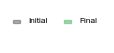

In [14]:
# Make the legend
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, axs = plt.subplots(figsize=(0.4, 1.3/3))
    patch_1 = mpatches.Patch(label="Initial", color="k", alpha=0.3, edgecolor="k")
    patch_2 = mpatches.Patch(label="Final", color=fit_color, alpha=0.5, edgecolor=fit_color)

    # add legends
    leg = plt.legend(handles=[patch_1, patch_2], ncols=2, handlelength=1, frameon=False)

    for patch in leg.get_patches():
        patch.set_height(2)
        patch.set_width(5)
        patch.set_y(0)
    
    axs.axes.set_axis_off()

    plt.savefig("../figures/evint_weight_distributions_legend.svg", transparent=True)
    plt.show()